### 1) 단순선형회귀(Simple Linear Regression Model)
<b><팁></b>  선형회귀 모델을 잘 학습시키려면 MSE값을 최소화하는 파라미터를 찾아야 한다. 이 과정에서 통계적 방식 회귀분석과 머신러닝 모델은 MSE값을 최소화하는 파라미터를 찾는다는 목표는 같지만, 문제해결 접근방식이 다르다. <u>통계적방식 회귀분석은 정규방정식</u>을, <u>머신러닝 모델은 경사하강법</u>을 사용해 문제를 해결한다.

##### 정규방정식
정규방정식을 사용하면 MSE값을 최소로 하는 파라미터를 바로 얻을 수 있다.

- scikit-learn : LinearRegression
최소 자승법을 사용한 OLS 방식으로 선형회귀모델을 구현한다. 즉, 계수 w를 사용해 선형모델을 피팅하여 데이터셋에서 관찰된 대상과 선형근사에 의해 예측된 대상 간의 잔차제곱합을 최소화한다.

In [3]:
# https://www.kaggle.com/datasets/mirichoi0218/insurance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('./insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


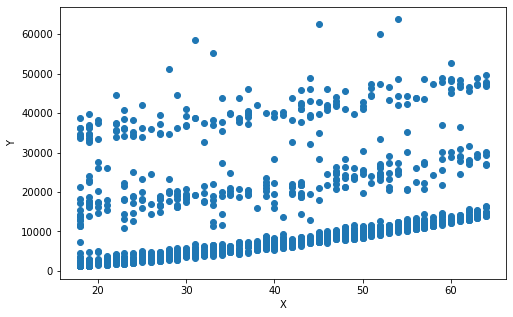

In [2]:
# 나이(age)와 의료비용(charges) 사이 선형모델 생성 전 데이터간 선형성을 확인해야 한다.
x = data['age']
y = data['charges']

plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
# .fit()을 이용해 데이터 학습시킨다
# 입력데이터는 2차원 array여야 하므로 .reshape()로 차원을 맞춰주어야 한다.
x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(1338,1)
y = y.reshape(1338,1)

lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [6]:
# scikit-learn 선형회귀모델 결과
print('절편', lr.intercept_, '계수', lr.coef_)
print('결정계수', lr.score(x,y))

# 결정계수가 8%로 낮게 나온 것을 알 수 있다.

절편 [3165.88500606] 계수 [[257.72261867]]
결정계수 0.08940589967885804


In [7]:
# 나이에 따른 의료비용 예측
x_new = [[19],[64]]
y_hat = lr.predict(x_new)
print(y_hat)

# 19살은 8062원, 64세는 19660원을 의료비용으로 지출한다고 예측함

[[ 8062.61476073]
 [19660.13260074]]


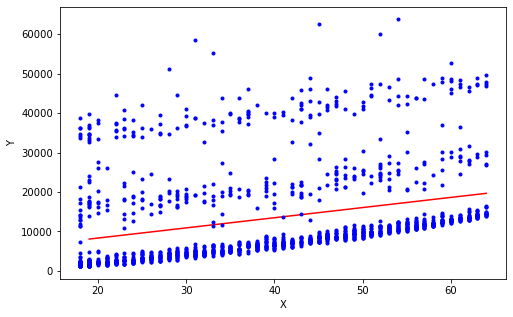

In [8]:
plt.figure(figsize=(8,5))
plt.plot(x_new,y_hat, '-r')
plt.plot(x,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##### 경사하강법
함수의 값이 낮아지는 방향으로 독립변수 값을 바꿔가며 최종적으로 최소함수값을 갖도록 하는 독립변수값을 찾는 방식이다. 최적화 알고리즘으로서, 함수를 최소화하기 위해 파라미터를 반복적으로 조정해나간다.

학습률이 너무 작으면 시간이 오래걸리고, 반대로 너무 높이면 함수값이 발산되는 경향이 있다. 하잎파라미터인 학습률을 적정한 크기로 조절해 사용해야 한다.

- scikit-learn : SGDRegressor

In [10]:
from sklearn.linear_model import SGDRegressor

x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(1338,1)
y = y.reshape(1338,1)

sgd = SGDRegressor(max_iter=1000, random_state=34)
sgd.fit(x,y.ravel())

SGDRegressor(random_state=34)

In [11]:
# SGD 회귀모델결과
print('절편', sgd.intercept_, '계수', sgd.coef_)

절편 [9057.21833765] 계수 [484.13243757]


In [12]:
# 나이에 따른 의료비용 예측
x_new = [[19],[64]]
y_hat = sgd.predict(x_new)
print(y_hat)

# 19살은 18255원, 64세는 40041원을 의료비용으로 지출한다고 예측함

[18255.73465154 40041.69434233]


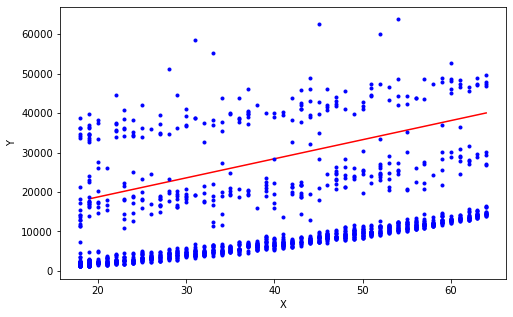

In [13]:
plt.figure(figsize=(8,5))
plt.plot(x_new,y_hat, '-r')
plt.plot(x,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 2) 다항회귀(Polynomial Regression)
데이터가 단순 직선 형태가 아닌 비선형 형태를 갖고 있을 때, 각 변수의 거듭제곱을 새로운 변수로 추가하여 확장된 특성을 데이터셋에 선형모델로 훈련시키는 기법을 다항회귀라고 한다.

- scikit-learn : PolynomialFeatures

In [14]:
# https://www.kaggle.com/datasets/crawford/80-cereals
import pandas as pd
data=pd.read_csv('./cereal.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [15]:
# 설탕함유량에 따른 영양등급평가 예측
# 분석에 필요한 데이터만 추출 (name, mfr, type 변수 제외)
data=data[data.columns[3:]]
# 설탕함유량(sugars)이 0이상인 데이터만 추출
data=data[data['sugars']>=0]
data.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


c:\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


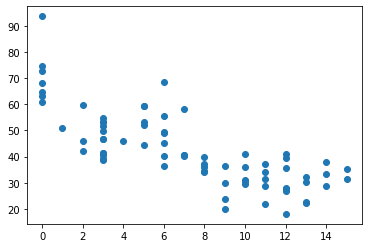

In [16]:
import matplotlib.pyplot as plt
cereal2=data[['sugars','rating']]
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2.reset_index(drop=True, inplace=True)
x=cereal2['sugars'].values
y=cereal2['rating'].values
plt.scatter(x,y)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [19]:
import numpy as np
x_test_poly=poly_reg.transform(x_test.reshape(-1,1))
pred=reg.predict(x_test_poly)

np.set_printoptions(precision=2)   # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1),
                      y_test.reshape(len(y_test),1)),
                      1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [ ]:
# p170